## Libraries

In [233]:
from pathlib import Path

import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Get Data

In [234]:
path = Path('../data/raw/PEDE_PASSOS_DATASET_FIAP.csv')

In [235]:
data = pd.read_csv(path, sep=';')

In [236]:
data.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [237]:
data.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  728 non-null    object 
 1   NOME                           1349 non-null   object 
 2   IDADE_ALUNO_2020               728 non-null    object 
 3   ANOS_PM_2020                   728 non-null    object 
 4   FASE_TURMA_2020                728 non-null    object 
 5   PONTO_VIRADA_2020              702 non-null    object 
 6   INDE_2020                      728 non-null    object 
 7   INDE_CONCEITO_2020             728 non-null    object 
 8   PEDRA_2020                     728 non-null    object 
 9   DESTAQUE_IEG_2020              728 non-null    object 
 10  DESTAQUE_IDA_2020              728 non-null    object 
 11  DESTAQUE_IPV_2020              703 non-null    object 
 12  IAA_2020                       728 non-null    o

In [239]:
long_data = pd.melt(data, id_vars=['NOME', 'IDADE_ALUNO_2020'], var_name='VARIAVEL', value_name='VALOR')

In [240]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO_2020,NaN
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO_2020,Escola Pública


In [241]:
long_data[['VARIAVEL', 'ANO']] = long_data['VARIAVEL'].str.rsplit('_', n=1, expand=True)

In [242]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR,ANO
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO,NaN,2020
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020


In [243]:
long_data['VARIAVEL'].unique()

array(['INSTITUICAO_ENSINO_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'FASE', 'TURMA', 'SINALIZADOR_INGRESSANTE',
       'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'NIVEL_IDEAL', 'DEFASAGEM', 'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF',
       'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype=object)

In [244]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Pedra 2020', 'Pedra 2021', 'Pedra 2022'), shared_yaxes=True)

In [245]:
pedras = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']
pedra = long_data[long_data['VALOR'].isin(pedras)]

In [246]:
anos = ['2020', '2021', '2022']

for i, ano in enumerate(anos, start=1):
    data_ano = pedra[pedra['ANO']==ano]

    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue

    valores = data_ano['VALOR'].value_counts()
    total = valores.sum()

    fig.add_trace(
        go.Bar(x=valores.index, y=valores.values, name=f'Ano {ano}',
               text=[f"{v} ({v / total:.1%})" for v in valores.values], textposition='auto'),
               row=1, col=i
    )

fig.update_layout(
    title="Classificação de PEDRA por Ano",
    height=400,
    width=1200,
    showlegend=False
)

fig.show()

In [247]:
# Lista de valores válidos
valores_validos = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']

# Filtrar os dados para apenas valores válidos

anos = ['2020', '2021', '2022']

for ano in anos:
    # Filtrar por ano
    data_ano = pedra[pedra['ANO'] == ano]
    
    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue
    
    # Contar valores
    valores = data_ano['VALOR'].value_counts()
    total = valores.sum()  # Total de ocorrências para calcular o percentual
    
    # Preparar os dados para o gráfico
    df_plot = valores.reset_index()
    df_plot.columns = ['Valor', 'Quantidade']
    df_plot['Percentual'] = df_plot['Quantidade'] / total * 100
    
    # Criar o gráfico com px
    fig = px.bar(
        df_plot,
        x='Valor',
        y='Quantidade',
        text=df_plot.apply(lambda row: f"{row['Quantidade']} ({row['Percentual']:.1f}%)", axis=1),
        title=f"Classificação de PEDRA - Ano {ano}",
        labels={'Quantidade': 'Quantidade'},
        template='plotly_white'
    )
    
    # Ajustar o layout
    fig.update_traces(textposition='outside')  # Mostrar rótulos fora das barras
    fig.update_layout(
        height=400,
        width=600,
        yaxis=dict(range=[0, 400]),  # Padronizar o eixo Y
    )
    
    # Mostrar o gráfico
    fig.show()

    fig.write_html(f'../reports/figures/pedra_{ano}.html')

In [248]:
contagem_com_inde = long_data[(long_data['VARIAVEL'] == 'INDE') & (long_data['VALOR'].notna())].groupby('ANO')['NOME'].nunique()
print(contagem_com_inde)

ANO
2020    728
2021    686
2022    862
Name: NOME, dtype: int64


In [249]:
fig = px.bar(contagem_com_inde, x=contagem_com_inde.index, y=contagem_com_inde.values, text=contagem_com_inde.values, title='Quantidade de alunos com INDE por ano', template='plotly_white')

fig.update_traces(textposition='outside')  # Mostrar rótulos fora das barras
fig.update_layout(
    height=400,
    width=600,
    yaxis_title=None,
    yaxis=dict(range=[0, 999])
)

fig.show()
fig.write_html('../reports/figures/alunos_por_ano.html')

In [250]:
long_data_inde = long_data[['NOME', 'ANO', 'VARIAVEL','VALOR']]
long_data_inde = long_data_inde[long_data_inde['VARIAVEL'] == 'INDE']
long_data_inde.head()

,NOME,ANO,VARIAVEL,VALOR
5396,ALUNO-1,2020,INDE,7.883752
5397,ALUNO-2,2020,INDE,NaN
5398,ALUNO-3,2020,INDE,7.856389666666666
5399,ALUNO-4,2020,INDE,5.076252
5400,ALUNO-5,2020,INDE,8.077085


In [251]:
# Convert 'VALOR' column to numeric, forcing errors to NaN
long_data_inde['VALOR'] = pd.to_numeric(long_data_inde['VALOR'], errors='coerce')

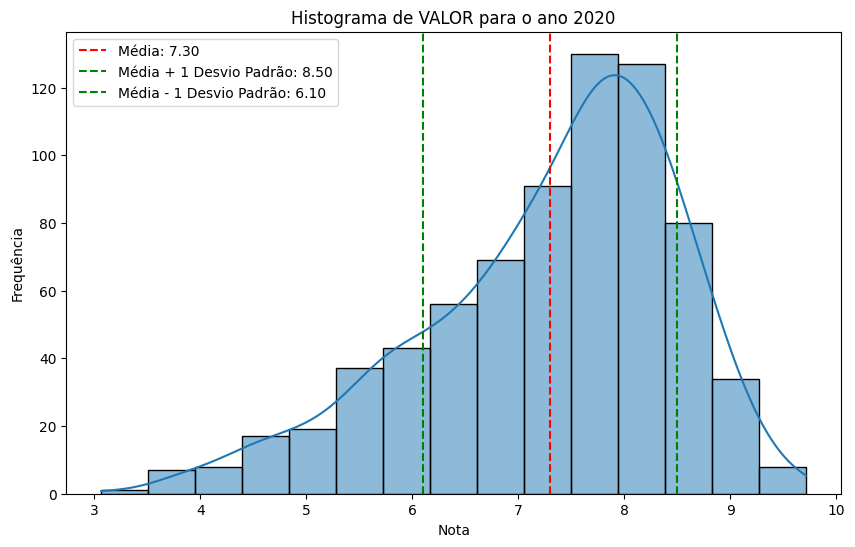

<Figure size 640x480 with 0 Axes>

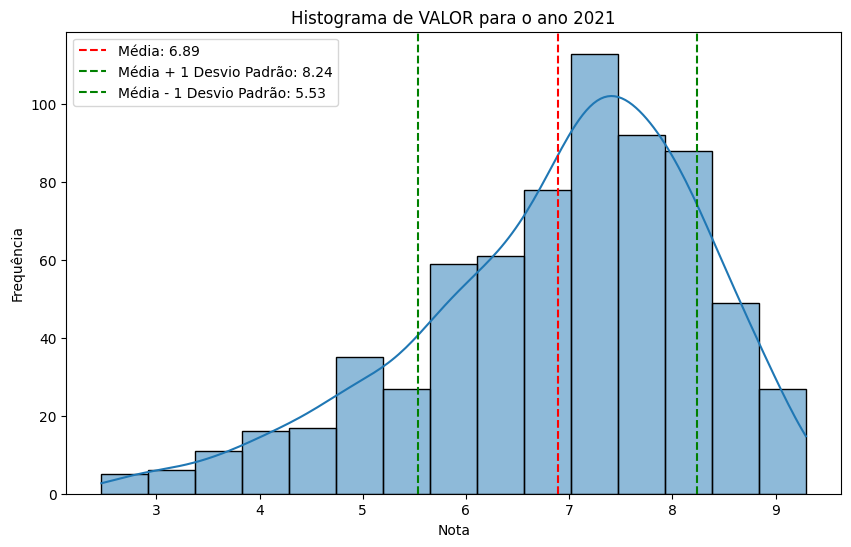

<Figure size 640x480 with 0 Axes>

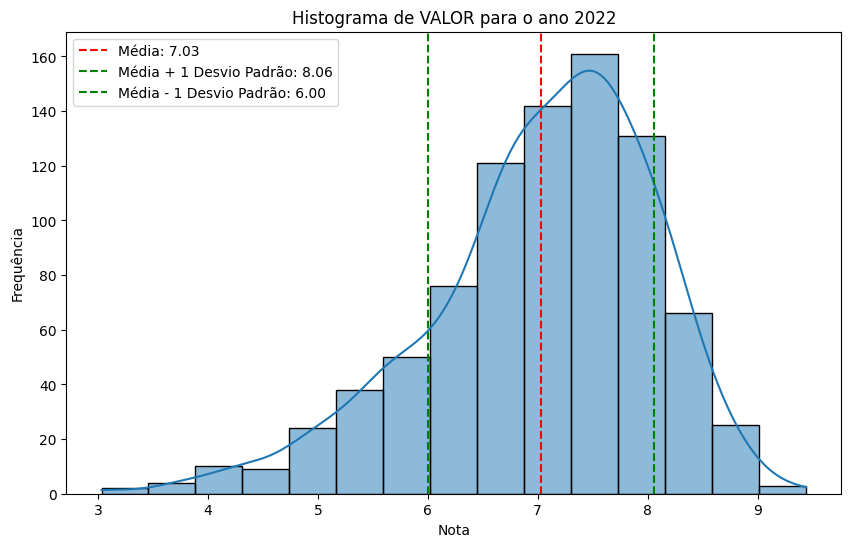

<Figure size 640x480 with 0 Axes>

In [252]:
import seaborn as sns

# sns.set_palette("YlGnBu")

import matplotlib.pyplot as plt

# Filtrar os dados para o ano 2022
data_ano = long_data_inde[long_data_inde['ANO'] == '2022']

# Remover valores NaN
data_ano = data_ano.dropna(subset=['VALOR'])

# Criar o histograma
for ano in anos:
    data_ano = long_data_inde[long_data_inde['ANO'] == ano]
    
    if data_ano.empty:
        print(f"Nenhum dado válido encontrado para o ano {ano}")
        continue
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data_ano['VALOR'], bins=15, kde=True)
    mean_val = data_ano['VALOR'].mean()
    std_val = data_ano['VALOR'].std()

    plt.axvline(mean_val, color='r', linestyle='--', label=f'Média: {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color='g', linestyle='--', label=f'Média + 1 Desvio Padrão: {mean_val + std_val:.2f}')
    plt.axvline(mean_val - std_val, color='g', linestyle='--', label=f'Média - 1 Desvio Padrão: {mean_val - std_val:.2f}')
    plt.legend()
    plt.title(f'Histograma de VALOR para o ano {ano}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    
    plt.show()

    plt.savefig(f'../reports/figures/histograma_{ano}.png')


In [253]:
long_data.head()

,NOME,IDADE_ALUNO_2020,VARIAVEL,VALOR,ANO
0,ALUNO-1,11,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
1,ALUNO-2,NaN,INSTITUICAO_ENSINO_ALUNO,NaN,2020
2,ALUNO-3,12,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
3,ALUNO-4,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020
4,ALUNO-5,10,INSTITUICAO_ENSINO_ALUNO,Escola Pública,2020


In [254]:
# Cálculo de categorias com base na média e no desvio padrão
def categorizar_pedra(valor, media, desvio):
    if pd.isna(valor):
        return 'NA'
    elif valor < media - desvio:
        return 'QU'
    elif media - desvio <= valor < media:
        return 'AG'
    elif media <= valor < media + desvio:
        return 'AM'
    else:
        return 'TO'

# Converter a coluna 'VALOR' para numérico, forçando erros para NaN
long_data['VALOR'] = pd.to_numeric(long_data['VALOR'], errors='coerce')

# Calcular média e desvio padrão por ano
stats = long_data.groupby('ANO')['VALOR'].agg(['mean', 'std']).reset_index()
stats.rename(columns={'mean': 'MEDIA', 'std': 'DESVIO'}, inplace=True)

# Mesclar as estatísticas aos dados originais
long_data = long_data.merge(stats, on='ANO', how='left')

# Categorizar os valores
long_data['PEDRA'] = long_data.apply(
    lambda row: categorizar_pedra(row['VALOR'], row['MEDIA'], row['DESVIO']), axis=1
)

# Remover duplicatas para garantir que a combinação de NOME e ANO seja única
long_data = long_data.drop_duplicates(subset=['NOME', 'ANO'])

# Pivotar os dados para trazer os anos como colunas
pivot_data = long_data.pivot(index='NOME', columns='ANO', values='PEDRA')
pivot_data.columns = [str(col) for col in pivot_data.columns]  # Garantir nomes como strings

# Criar a coluna de evolução
pivot_data['EVOLUCAO'] = pivot_data.apply(lambda row: '-'.join(row.fillna('NA')), axis=1)

# Resetar o índice para ter uma tabela final
evolucao = pivot_data.reset_index()

In [255]:
evolucao.head()

,NOME,2020,2021,2022,EVOLUCAO
0,ALUNO-1,NA,QU,NA,NA-QU-NA
1,ALUNO-10,NA,NA,NA,NA-NA-NA
2,ALUNO-100,NA,QU,AG,NA-QU-AG
3,ALUNO-1000,NA,NA,AG,NA-NA-AG
4,ALUNO-1001,NA,QU,AG,NA-QU-AG


In [256]:
quartzo = evolucao[evolucao['EVOLUCAO'].str.contains('QU')]
quartzo.head()

,NOME,2020,2021,2022,EVOLUCAO
0,ALUNO-1,NA,QU,NA,NA-QU-NA
2,ALUNO-100,NA,QU,AG,NA-QU-AG
4,ALUNO-1001,NA,QU,AG,NA-QU-AG
7,ALUNO-1004,NA,QU,AG,NA-QU-AG
10,ALUNO-1007,NA,QU,NA,NA-QU-NA


In [257]:
quartzo_analysis = pd.DataFrame()
# quartzo_analysis['ID'] = long_data[['NOME', 'ANO']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [266]:
quartzo_analysis = long_data[['NOME', 'ANO', 'PEDRA', 'VALOR']]

In [268]:
quartzo_analysis = quartzo_analysis[quartzo_analysis['PEDRA'] != 'NA']

In [269]:
quartzo_analysis

,NOME,ANO,PEDRA,VALOR
22933,ALUNO-1,2021,QU,2.0
22935,ALUNO-3,2021,AG,3.0
22937,ALUNO-5,2021,QU,2.0
22940,ALUNO-8,2021,AG,5.0
22943,ALUNO-11,2021,QU,1.0
...,...,...,...,...
51254,ALUNO-1342,2022,AG,2.0
51255,ALUNO-1343,2022,AG,2.0
51258,ALUNO-1346,2022,AG,0.0
51260,ALUNO-1348,2022,AG,4.0
